In [11]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score


data = pd.read_csv("C:/Users/Пользователь/Desktop/DataMining/winequality-red.csv")


data = data.dropna(subset=["quality"])


data["fixed acidity"].fillna(data["fixed acidity"].mean(), inplace=True) 
data["volatile acidity"].fillna(data["volatile acidity"].mean(), inplace=True) 
data["citric acid"].fillna(data["citric acid"].mean(), inplace=True) 
data["residual sugar"].fillna(data["residual sugar"].mean(), inplace=True) 
data["chlorides"].fillna(data["chlorides"].mean(), inplace=True) 
data["free sulfur dioxide"].fillna(data["free sulfur dioxide"].mean(), inplace=True) 
data["total sulfur dioxide"].fillna(data["total sulfur dioxide"].mean(), inplace=True) 
data["density"].fillna(data["density"].mean(), inplace=True) 
data["pH"].fillna(data["pH"].mean(), inplace=True) 
data["sulphates"].fillna(data["sulphates"].mean(), inplace=True) 
data["alcohol"].fillna(data["alcohol"].mean(), inplace=True)

#Преобразование категориальных признаков в числовые
data = pd.get_dummies(data, columns=["quality"])

#Выбор признаков и целевой переменной
X = data.drop(["fixed acidity", "volatile acidity","citric acid", "residual sugar",  "chlorides","free sulfur dioxide", "total sulfur dioxide",  "density", "pH", "sulphates","alcohol"  ], axis=1, inplace=True)
y = data["quality"]

#Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Создание классификатора (в данном случае, RandomForestClassifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42) 
clf.fit(X_train, y_train)

#Функция для оценки качества модели
def evaluate(ind): # Индексы выбранных признаков 
    selected_features = np.nonzero(ind)[0]

 
# Обучение модели только на выбранных признаках
    clf.fit(X_train.iloc[:, selected_features], y_train)

# Прогнозирование на тестовом наборе
    y_pred = clf.predict(X_test.iloc[:, selected_features])

# Возвращаем точность модели
    return accuracy_score(y_test, y_pred),
#Настраиваем DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox() 
toolbox.register("attr_bool", np.random.choice, [0, 1]) 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns)) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate) 
toolbox.register("mate", tools.cxTwoPoint) 
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) 
toolbox.register("select", tools.selTournament, tournsize=3)

#Создаем начальную популяцию
population = toolbox.population(n=50)

#Запускаем генетический алгоритм
algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=100, cxpb=0.7, mutpb=0.2, ngen=10, stats=None, halloffame=None)

#Получаем лучшую особь
best_individual = tools.selBest(population, k=1)[0]

#Выводим выбранные признаки
selected_features = np.nonzero(best_individual)[0] 
print("Выбранные признаки:", X.columns[selected_features])

KeyError: 'quality'

In [17]:
import numpy as np

def fitness(individual, dataset):
    # Вычисляет значение функции приспособленности для особи
    predicted_quality = individual[-1]
    actual_quality = dataset[:,-1]
    return np.mean(np.abs(actual_quality - predicted_quality))

def crossover(parent1, parent2):
    # Операция скрещивания (однородное скрещивание)
    child = np.empty(len(parent1))
    for i in range(len(parent1)):
        child[i] = parent1[i] if np.random.rand() < 0.5 else parent2[i]
    return child

def mutate(individual, probability):
    # Операция мутации (изменение случайного гена)
    for i in range(len(individual)):
        if np.random.rand() < probability:
            individual[i] = np.random.uniform(low=0, high=1)
    return individual

def create_population(population_size, chromosome_length):
    # Инициализация начальной популяции особей случайными значениями в диапазоне [0, 1]
    return np.random.uniform(size=(population_size, chromosome_length))

def genetic_algorithm(dataset, population_size, chromosome_length, num_generations):
    # Инициализация популяции
    population = create_population(population_size, chromosome_length)

    for generation in range(num_generations):
    # Оценка приспособленности каждой особи в популяции
        fitness_values = np.zeros(population_size)
        for i in range(population_size):
            fitness_values[i] = fitness(population[i], dataset)

    # Сортировка популяции по убыванию приспособленности
        sorted_indices = np.argsort(fitness_values)
        population = population[sorted_indices]

    # Создание новой популяции
        new_population = np.zeros((population_size, chromosome_length))
        for i in range(population_size):
        # Выбор родителей
            parent1 = population[np.random.randint(0, population_size//2)]
            parent2 = population[np.random.randint(0, population_size//2)]

        # Скрещивание родителей
            child = crossover(parent1, parent2)

        # Мутация потомка
            child = mutate(child, probability=0.01)

        # Добавление потомка в новую популяцию
            new_population[i] = child

        population = new_population

# Вывод лучшей особи (модели)
    best_individual = population[0]
    print("Best individual:", best_individual)
    return best_individual

# Загрузка данных
data = np.genfromtxt("C:/Users/Пользователь/Desktop/DataMining/winequality-red.csv", delimiter=",", skip_header=1)

# Наименования признаков
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Параметры генетического алгоритма
population_size = 50
chromosome_length = len(data[0]) - 1
num_generations = 100

# Запуск генетического алгоритма
best_individual = genetic_algorithm(data, population_size, chromosome_length, num_generations)

selected_features = []
for i in range(len(best_individual)):
    if best_individual[i] > 0.5: # Ваше условие для выбора признаков (например, значение больше 0.5)
        selected_features.append(i) # Добавление индекса признака в список

selected_feature_names = [feature_names[i] for i in selected_features] # Соответствующие наименования выбранных признаков

print("Признаки, которые максимизируют модель:", selected_feature_names)

Best individual: [0.65849721 0.30913122 0.98809032 0.13963948 0.0557362  0.66826956
 0.69709934 0.21467935 0.33539209 0.1840137  0.99992142]
Признаки, которые максимизируют модель: ['fixed acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']


Best individual: [0.92481449 0.3257002  0.36586268 0.52190522 0.60892129 0.53987505
 0.47293027 0.70567104 0.63088893 0.98105064 0.57514574]


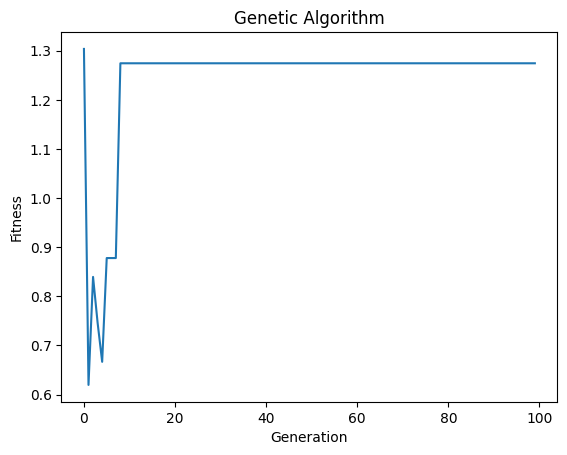

Признаки, которые максимизируют модель: ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fitness(individual, dataset): # Вычисляет значение функции приспособленности для особи 
    selected_features = np.where(individual > 0.5)[0]
    predicted_quality = np.mean(dataset[:, selected_features], axis=1)
    actual_quality = dataset[:, -1]
    return np.mean(np.abs(actual_quality - predicted_quality))

def crossover(parent1, parent2): # Операция скрещивания (однородное скрещивание) 
    child = np.empty(len(parent1)) 
    for i in range(len(parent1)): 
        child[i] = parent1[i] if np.random.rand() < 0.5 else parent2[i] 
    return child

def mutate(individual, probability): # Операция мутации (изменение случайного гена) 
    for i in range(len(individual)): 
        if np.random.rand() < probability: 
            individual[i] = np.random.uniform(low=0, high=1) 
    return individual

def create_population(population_size, chromosome_length): # Инициализация начальной популяции особей случайными значениями в диапазоне [0, 1] 
    return np.random.uniform(size=(population_size, chromosome_length))

def genetic_algorithm(dataset, population_size, chromosome_length, num_generations): # Инициализация популяции 
    population = create_population(population_size, chromosome_length)
    fitness_history = [] # список для хранения значений функции приспособленности в каждом поколении

    for generation in range(num_generations):
        # Оценка приспособленности каждой особи в популяции
        
        fitness_values = np.zeros(population_size)
        for i in range(population_size):
            fitness_values[i] = fitness(population[i], dataset)
    
        for i in range(population_size):
            fitness_values[i] = fitness(population[i], dataset)
            
        # Сортировка популяции по убыванию приспособленности
        sorted_indices = np.argsort(fitness_values)
        population = population[sorted_indices]
        
        # Создание новой популяции
        new_population = np.zeros((population_size, chromosome_length))
        for i in range(population_size):
            # Выбор родителей
            parent1 = population[np.random.randint(0, population_size//2)]
            parent2 = population[np.random.randint(0, population_size//2)]
            
            # Скрещивание родителей
            child = crossover(parent1, parent2)
            
            # Мутация потомка
            child = mutate(child, probability=0.01)
            
            # Добавление потомка в новую популяцию
            new_population[i] = child
            
        population = new_population
        fitness_history.append(np.min(fitness_values))
    # Вывод лучшей особи (модели)
    best_individual = population[0]
    print("Best individual:", best_individual)

# Построение графика изменения значения функции приспособленности
    plt.plot(np.arange(num_generations), fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Genetic Algorithm")
    plt.show()

    return best_individual

# Загрузка данных
data = np.genfromtxt("C:/Users/Пользователь/Desktop/DataMining/winequality-red.csv", delimiter=",", skip_header=1)

# Наименования признаков
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Параметры генетического алгоритма
population_size = 50 
chromosome_length = len(data[0]) - 1 
num_generations = 100

# Запуск генетического алгоритма
best_individual = genetic_algorithm(data, population_size, chromosome_length, num_generations)

selected_features = np.where(best_individual > 0.5)[0]
selected_feature_names = [feature_names[i] for i in selected_features] # Соответствующие наименования выбранных признаков

print("Признаки, которые максимизируют модель:", selected_feature_names)


Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49


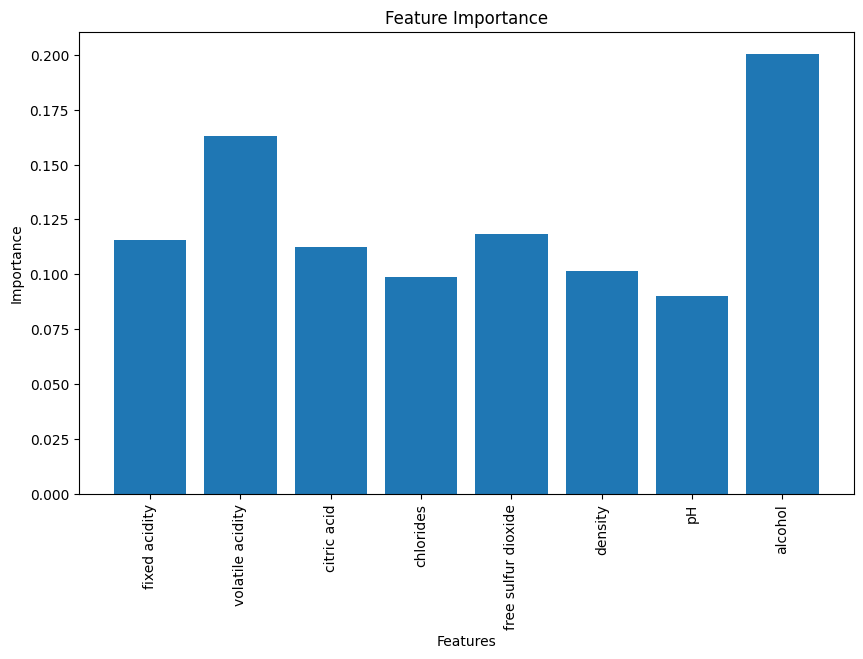

Best features: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'alcohol']


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
data = pd.read_csv("C:/Users/Пользователь/Desktop/DataMining/winequality-red.csv")

# Разделение данных на признаки и целевую переменную
X = data.drop('quality', axis=1)
y = data['quality']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def visualize_feature_importance(best_features):
    selected_features_indices = [X.columns.get_loc(feature) for feature in best_features]

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train.iloc[:, selected_features_indices], y_train)

    feature_importance = model.feature_importances_
    feature_names = X_train.columns[selected_features_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, feature_importance)
    plt.xticks(rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Feature Importance")
    plt.show()


# Функция для оценки точности модели с определенным набором признаков
def evaluate_individual(individual):
    selected_features = [feat for feat, selected in zip(X.columns, individual) if selected]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Функция для оценки приспособленности особи в популяции
def evaluate_population(population):
    accuracies = []
    for individual in population:
        accuracy = evaluate_individual(individual)
        accuracies.append(accuracy)
    
    return accuracies

# Генерация начальной популяции
def generate_population(population_size, num_features):
    population = []
    for _ in range(population_size):
        individual = np.random.choice([False, True], size=num_features)
        population.append(individual)
    
    return population

# Функция скрещивания особей
def crossover(parent1, parent2):
    crossover_point = np.random.randint(len(parent1))
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    
    return child

# Функция мутации особи
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.random() < mutation_rate:
            individual[i] = not individual[i]
    
    return individual

# Генетический алгоритм
def genetic_algorithm(population_size, num_generations, mutation_rate):
    num_features = len(X.columns)
    
    # Генерация начальной популяции
    population = generate_population(population_size, num_features)
    
    for generation in range(num_generations):
        print("Generation:", generation)
        
        # Вычисление приспособленности популяции
        accuracies = evaluate_population(population)
        
        # Выполнение селекции
        selected_indices = np.argsort(accuracies)[::-1][:population_size // 2]
        selected_population = [population[i] for i in selected_indices]
        
        # Создание новой популяции путем скрещивания и мутации
        new_population = []
        while len(new_population) < population_size:
            parent1_index = np.random.choice(len(selected_population))
            parent2_index = np.random.choice(len(selected_population))
            
            parent1 = selected_population[parent1_index]
            parent2 = selected_population[parent2_index]
            
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            
            new_population.append(child)
        
        population = new_population
    
    # Вычисление приспособленности финальной популяции
    accuracies = evaluate_population(population)
    best_individual = population[np.argmax(accuracies)]
    best_features = [feat for feat, selected in zip(X.columns, best_individual) if selected]
    visualize_feature_importance(best_features)
    return best_features

# Запуск генетического алгоритма
population_size = 100
num_generations = 50
mutation_rate = 0.1
best_features = genetic_algorithm(population_size, num_generations, mutation_rate)


print("Best features:", best_features)




In [1]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

import pandas as pd

data = pd.read_excel('C:/Users/Пользователь/Desktop/DataMining/Бустинг.xlsx')
data = data[['Набранные_очки','Забитые_голы', 'Удары', 'Владение_мячом,'Удары_в створ','% ударов в створ','Пропущенные голы']]
X = data.drop(['Счёт'], axis=1)
y = data['Счёт']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Бустинг
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train_scaled, y_train)
boosting_predictions = boosting_model.predict(X_test_scaled)

# Беггинг
bagging_model = RandomForestRegressor()
bagging_model.fit(X_train_scaled, y_train)
bagging_predictions = bagging_model.predict(X_test_scaled)

# Стекинг
base_models = [('linear_regression', LinearRegression()),               ('svm', SVR())]
stacking_model = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor())
stacking_model.fit(X_train_scaled, y_train)
stacking_predictions = stacking_model.predict(X_test_scaled)

boosting_error = mean_squared_error(y_test, boosting_predictions)
bagging_error = mean_squared_error(y_test, bagging_predictions)
stacking_error = mean_squared_error(y_test, stacking_predictions)

print('Boosting Error:', boosting_error)
print('Bagging Error:', bagging_error)
print('Stacking Error:', stacking_error)

ValueError: could not convert string to float: 'Текстильщик'

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
data = pd.read_excel('C:/Users/Пользователь/Desktop/DataMining/золото-(банк-россии) (1).xlsx')

print(data)



model = LinearRegression().fit(x, y)

          Дата  Значение
0   2023-12-23   6035.07
1   2023-12-22   6001.66
2   2023-12-21   5933.40
3   2023-12-20   5862.09
4   2023-12-19   5907.79
..         ...       ...
198 2023-05-06   5050.08
199 2023-05-05   5091.13
200 2023-05-04   5087.83
201 2023-05-03   5096.74
202 2023-05-02   5139.72

[203 rows x 2 columns]


NameError: name 'x' is not defined

[*********************100%%**********************]  1 of 1 completed


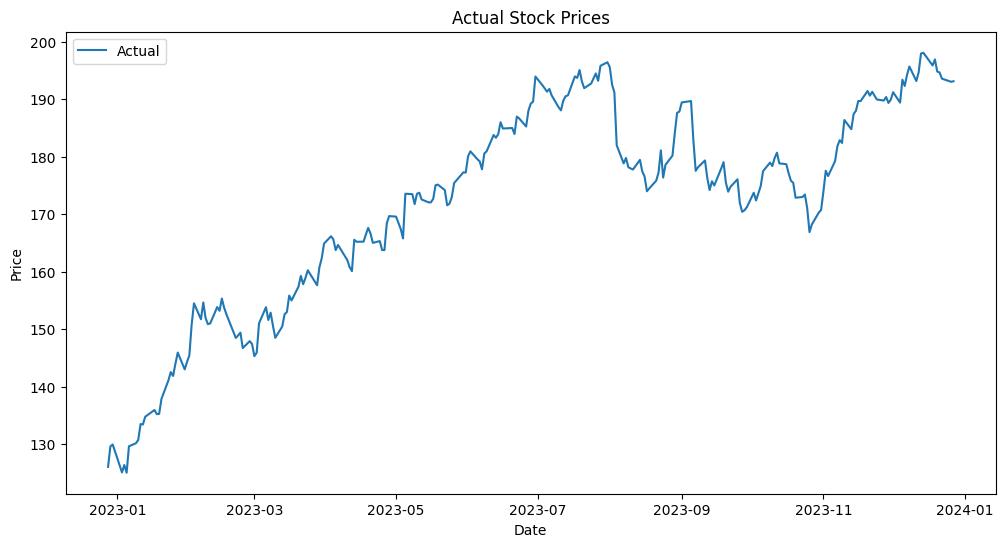

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_9052\79517477.py:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=data.index[-1], periods=365, closed='right')


AttributeError: 'Int64Index' object has no attribute 'reshape'

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_stock_data(ticker):
    # Получение данных акций с помощью yfinance
    data = yf.download(ticker, period="1y")
    return data

def plot_stock_prices(data):
    # Вывод графика актуальных цен акций
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Actual')
    plt.title('Actual Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def forecast_stock_prices(data):
    # Создание модели линейной регрессии
    model = LinearRegression()

    # Получение массивов с датами и ценами акций
    dates = pd.to_numeric(data.index).to_numpy().reshape(-1, 1)
    prices = data['Close'].values.reshape(-1, 1)

    # Обучение модели на исходных данных
    model.fit(dates, prices)

    # Создание массива с датами для прогноза
    future_dates = pd.date_range(start=data.index[-1], periods=365, closed='right')

    # Сделать прогноз на основе модели
    forecast_prices = model.predict(pd.to_numeric(future_dates).reshape(-1, 1))

    # Создание DataFrame с прогнозируемыми ценами акций
    forecast_data = pd.DataFrame(forecast_prices, index=future_dates, columns=['Forecast'])

    # Вывод графика прогнозируемых цен акций
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Actual')
    plt.plot(forecast_data, label='Forecast')
    plt.title('Forecasted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def calculate_accuracy(data):
    # Создание модели линейной регрессии
    model = LinearRegression()

    # Получение массивов с датами и ценами акций
    dates = pd.to_numeric(data.index).reshape(-1, 1)
    prices = data['Close'].values.reshape(-1, 1)

    # Обучение модели на исходных данных
    model.fit(dates, prices)

    # Расчет точности модели (среднеквадратическая ошибка)
    predictions = model.predict(dates)
    accuracy = mean_squared_error(prices, predictions)

    return accuracy

def calculate_profit(data):
    # Получение цены акции на текущую дату и на дату через год
    current_price = data['Close'][-1]
    future_price = data['Close'][-365]

    # Расчет прибыли через год
    profit = (future_price / current_price - 1) * 100

    return profit

def main():
    ticker = 'AAPL'  # Замените на нужный вам тикер акции

    # Получение данных акций и вывод графиков
    data = get_stock_data(ticker)
    plot_stock_prices(data)
    forecast_stock_prices(data)

    # Расчет точности модели и прибыли через год
    accuracy = calculate_accuracy(data)
    profit = calculate_profit(data)

    print(f"Accuracy: {accuracy}")
    print(f"Profit after 1 year: {profit}%")

if __name__ == '__main__':
    main()

In [4]:
import requests
import matplotlib.pyplot as plt

# Получаем данные о ценах на акции с сайта finam.ru
response_gazprom = requests.get('https://finam.ru/gazp/torgi/')
response_sberbank = requests.get('https://finam.ru/sber/torgi/')
response_lukoil = requests.get('https://finam.ru/lkoh/torgi/')

# Получаем данные в формате JSON
data_gazprom = response_gazprom.json()
data_sberbank = response_sberbank.json()
data_lukoil = response_lukoil.json()

# Визуализируем данные о ценах на акции
plt.plot(data_gazprom['dates'], data_gazprom['prices'], label='GAZP')
plt.plot(data_sberbank['dates'], data_sberbank['prices'], label='SBER')
plt.plot(data_lukoil['dates'], data_lukoil['prices'], label='LKOH')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

# Написать алгоритм определения, в какую из акций лучше всего инвестировать

# Написать алгоритм расчета прибыли через год

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

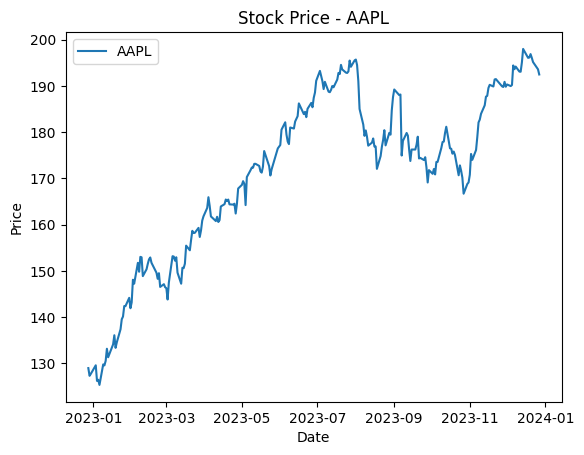

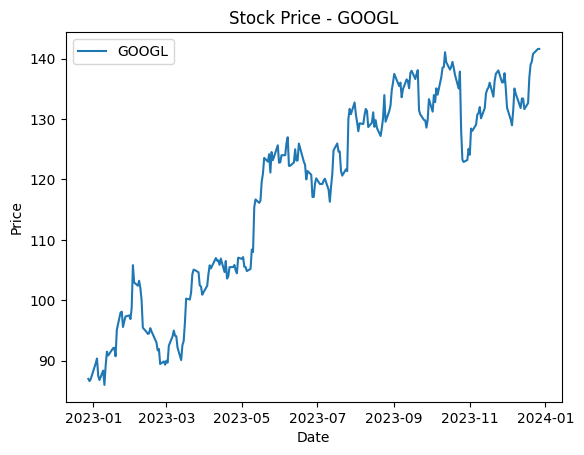

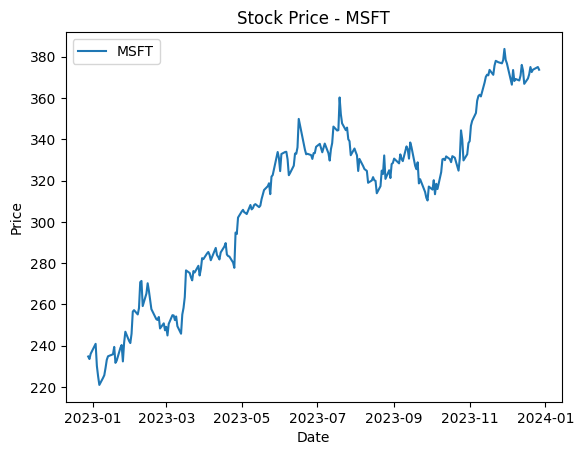

Profit for AAPL : -33009.909529908684
Profit for GOOGL : -38569.10402810919
Profit for MSFT : -37165.03198517103
Best stock for investment: AAPL


In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Функция для получения данных акций
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    return stock.history(period="1y")

# Функция для отображения графика цены акции
def plot_stock_price(stock_data, ticker, title):
    plt.plot(stock_data["Open"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend([ticker])
    plt.show()

# Функция для расчета прибыли через год
# Функция для расчета прибыли через год
def calculate_profit(stock_data):
    initial_investment = 100000
    current_price = stock_data["Open"].iloc[-1]
    if len(stock_data) >= 252:  # Проверка количества записей
        future_price = stock_data["Open"].iloc[-252]
    else:
        future_price = stock_data["Open"].iloc[0]  # Если записей меньше 252, используем первое значение
    profit = (future_price - current_price) / current_price * initial_investment
    return profit

# Получение данных акций
ticker1 = "AAPL"  # Пример тикера акции
ticker2 = "GOOGL"  # Пример тикера акции
ticker3 = "MSFT"  # Пример тикера акции

stock_data1 = get_stock_data(ticker1)
stock_data2 = get_stock_data(ticker2)
stock_data3 = get_stock_data(ticker3)

# Отображение графиков цены акций
plot_stock_price(stock_data1, ticker1, "Stock Price - " + ticker1) 
plot_stock_price(stock_data2, ticker2, "Stock Price - " + ticker2) 
plot_stock_price(stock_data3, ticker3, "Stock Price - " + ticker3)

# Расчет и вывод прибыли через год для каждой акции
profit1 = calculate_profit(stock_data1)
profit2 = calculate_profit(stock_data2)
profit3 = calculate_profit(stock_data3)

print("Profit for", ticker1, ":", profit1)
print("Profit for", ticker2, ":", profit2)
print("Profit for", ticker3, ":", profit3)

# Определение наилучшей акции для инвестирования
best_stock = [ticker1, ticker2, ticker3][[profit1, profit2, profit3].index(max(profit1, profit2, profit3))]
print("Best stock for investment:", best_stock)

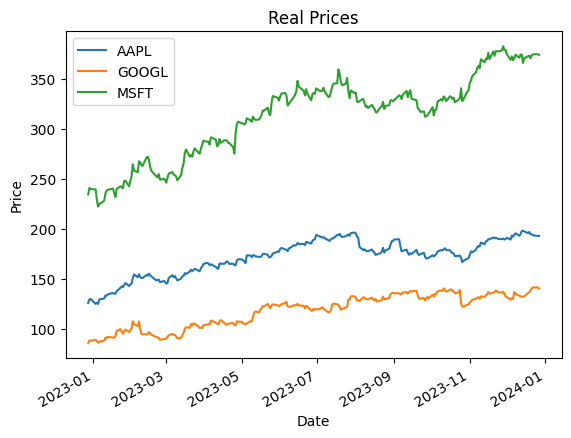

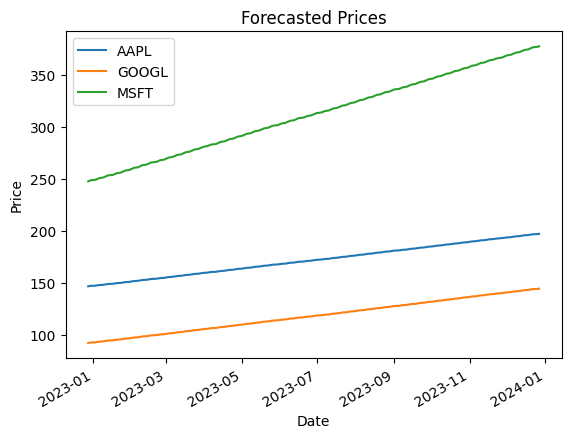

Yearly Profit: 58102.20950917184


In [13]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Загрузка данных с сайта finam
data = yf.download(['AAPL', 'GOOGL', 'MSFT'], period='1y', progress=False)

# Создание DataFrame с ценами акций
prices = data['Close']

# Вывод графиков реальных цен
prices.plot()
plt.title('Real Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Прогнозирование цен с помощью линейной регрессии
forecasted_prices = pd.DataFrame(index=prices.index)

for stock in prices.columns:
    model = LinearRegression()
    X = pd.DataFrame(range(len(prices)), columns=['Days'])
    y = prices[stock]
    model.fit(X, y)
    forecasted_prices[stock] = model.predict(X)

# Вывод графиков прогнозируемых цен
forecasted_prices.plot()
plt.title('Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Вычисление годовой прибыли
initial_investment = 100000
allocation = [0.4, 0.3, 0.3]  # Распределение инвестиций по акциям
final_prices = prices.iloc[-1]  # Конечные цены акций
investment_value = np.multiply(allocation, initial_investment) * (final_prices / prices.iloc[0])
profit = investment_value.sum() - initial_investment
print('Yearly Profit:', profit)

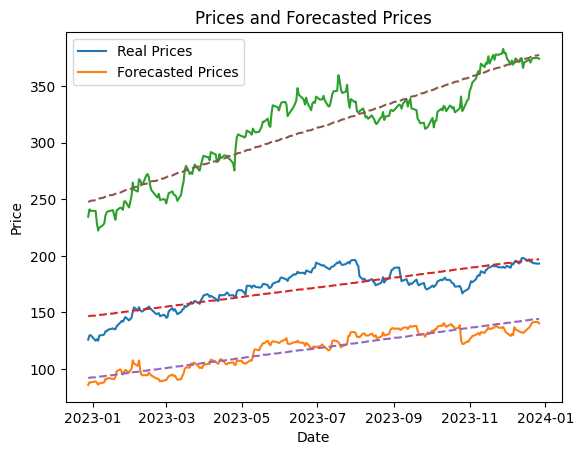

Model Accuracy: 0.673403987439162
Model Accuracy: 0.857641218463437
Model Accuracy: 0.8339625456136412


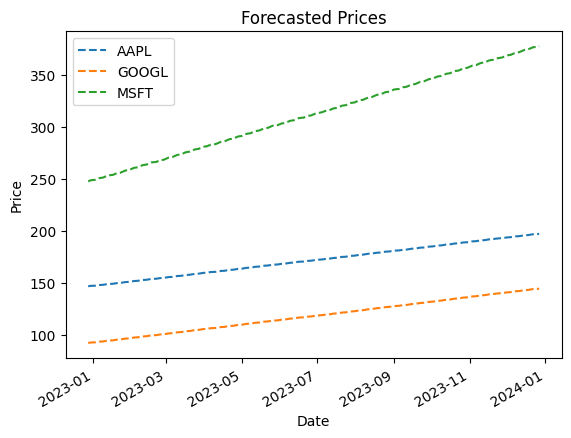

Yearly Profit: 58102.20950917184


In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Загрузка данных с сайта finam
data = yf.download(['AAPL', 'GOOGL', 'MSFT'], period='1y', progress=False)

# Создание DataFrame с ценами акций
prices = data['Close']

# Вывод графиков реальных и прогнозируемых цен
plt.plot(prices.index, prices.values)
plt.plot(forecasted_prices.index, forecasted_prices.values, linestyle='dashed')
plt.title('Prices and Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Real Prices', 'Forecasted Prices'])
plt.show()

# Прогнозирование цен с помощью линейной регрессии
forecasted_prices = pd.DataFrame(index=prices.index)

for stock in prices.columns:
    model = LinearRegression()
    X = pd.DataFrame(range(len(prices)), columns=['Days'])
    y = prices[stock]
    model.fit(X, y)
    forecasted_prices[stock] = model.predict(X)
    accuracy = model.score(X, y) 
    print('Model Accuracy:', accuracy)

# Вывод графиков прогнозируемых цен
forecasted_prices.plot(style='--')
plt.title('Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Вычисление годовой прибыли
initial_investment = 100000
allocation = [0.4, 0.3, 0.3]  # Распределение инвестиций по акциям
final_prices = prices.iloc[-1]  # Конечные цены акций
investment_value = np.multiply(allocation, initial_investment) * (final_prices / prices.iloc[0])
profit = investment_value.sum() - initial_investment
print('Yearly Profit:', profit)

Model Accuracy for AAPL: 0.673403987439162
Model Accuracy for GOOGL: 0.857641218463437
Model Accuracy for MSFT: 0.8339625456136412


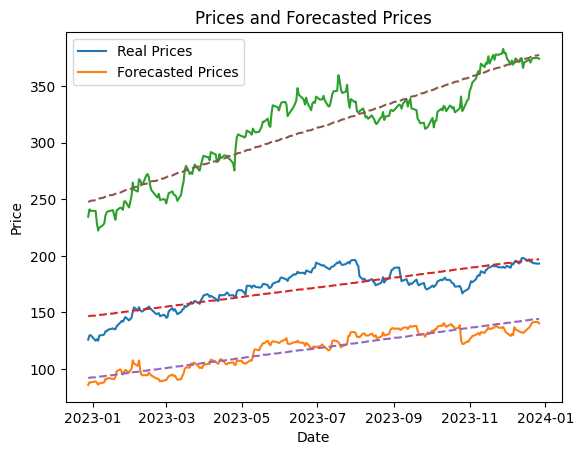

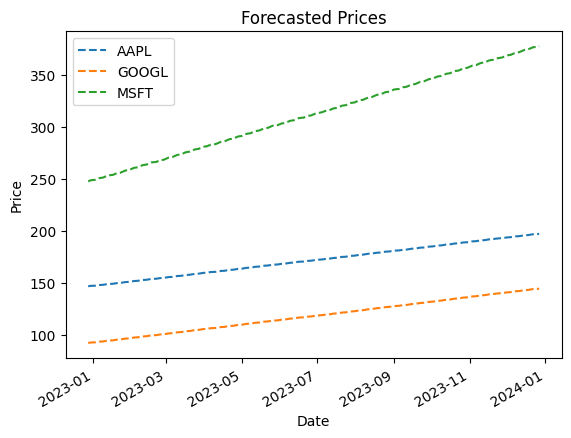

Yearly Profit: 58102.20950917184


In [16]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Загрузка данных с сайта finam
data = yf.download(['AAPL', 'GOOGL', 'MSFT'], period='1y', progress=False)

# Создание DataFrame с ценами акций
prices = data['Close']

# Прогнозирование цен с помощью линейной регрессии
forecasted_prices = pd.DataFrame(index=prices.index)

for stock in prices.columns:
    model = LinearRegression()
    X = pd.DataFrame(range(len(prices)), columns=['Days'])
    y = prices[stock]
    model.fit(X, y)
    forecasted_prices[stock] = model.predict(X)
    accuracy = model.score(X, y)
    print(f'Model Accuracy for {stock}: {accuracy}')

# Вывод графиков реальных и прогнозируемых цен
plt.plot(prices.index, prices.values)
plt.plot(forecasted_prices.index, forecasted_prices.values, linestyle='dashed')
plt.title('Prices and Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Real Prices', 'Forecasted Prices'])
plt.show()

# Вывод графиков прогнозируемых цен
forecasted_prices.plot(style='--')
plt.title('Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Вычисление годовой прибыли
initial_investment = 100000
allocation = [0.4, 0.3, 0.3]  # Распределение инвестиций по акциям
final_prices = prices.iloc[-1]  # Конечные цены акций
investment_value = np.multiply(allocation, initial_investment) * (final_prices / prices.iloc[0])
profit = investment_value.sum() - initial_investment
print('Yearly Profit:', profit)

Model Accuracy for AAPL: Train - 0.9985943211547629, Test - 0.9913788803936469
Model Accuracy for GOOGL: Train - 0.9979901478429918, Test - 0.989049190509673
Model Accuracy for MSFT: Train - 0.9987553508274009, Test - 0.9861317846796179


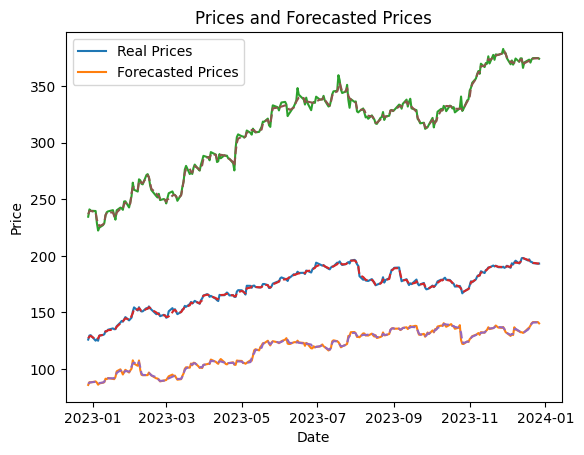

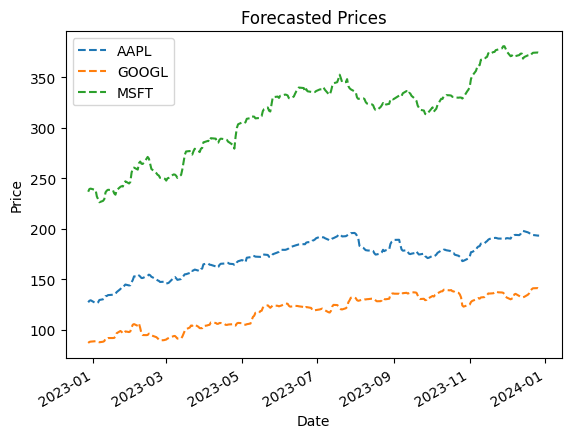

Yearly Profit: 58102.20950917184


In [17]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Загрузка данных с сайта finam
data = yf.download(['AAPL', 'GOOGL', 'MSFT'], period='1y', progress=False)

# Создание DataFrame с ценами акций
prices = data['Close']

# Прогнозирование цен с помощью случайного леса
forecasted_prices = pd.DataFrame(index=prices.index)

for stock in prices.columns:
    X = pd.DataFrame(np.arange(len(prices)), columns=['Days'])
    y = prices[stock]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train = r2_score(y_train, y_train_pred)
    accuracy_test = r2_score(y_test, y_test_pred)
    print(f'Model Accuracy for {stock}: Train - {accuracy_train}, Test - {accuracy_test}')
    
    forecasted_prices[stock] = model.predict(X)
  
# Вывод графиков реальных и прогнозируемых цен
plt.plot(prices.index, prices.values)
plt.plot(forecasted_prices.index, forecasted_prices.values, linestyle='dashed')
plt.title('Prices and Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Real Prices', 'Forecasted Prices'])
plt.show()

# Вывод графиков прогнозируемых цен
forecasted_prices.plot(style='--')
plt.title('Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Вычисление годовой прибыли
initial_investment = 100000
allocation = [0.4, 0.3, 0.3]  # Распределение инвестиций по акциям
final_prices = prices.iloc[-1]  # Конечные цены акций
investment_value = np.multiply(allocation, initial_investment) * (final_prices / prices.iloc[0])
profit = investment_value.sum() - initial_investment
print('Yearly Profit:', profit)

Model Accuracy for AAPL: Train - 0.9985943211547629, Test - 0.9913788803936469
Model Accuracy for GOOGL: Train - 0.9979901478429918, Test - 0.989049190509673
Model Accuracy for MSFT: Train - 0.9987553508274009, Test - 0.9861317846796179


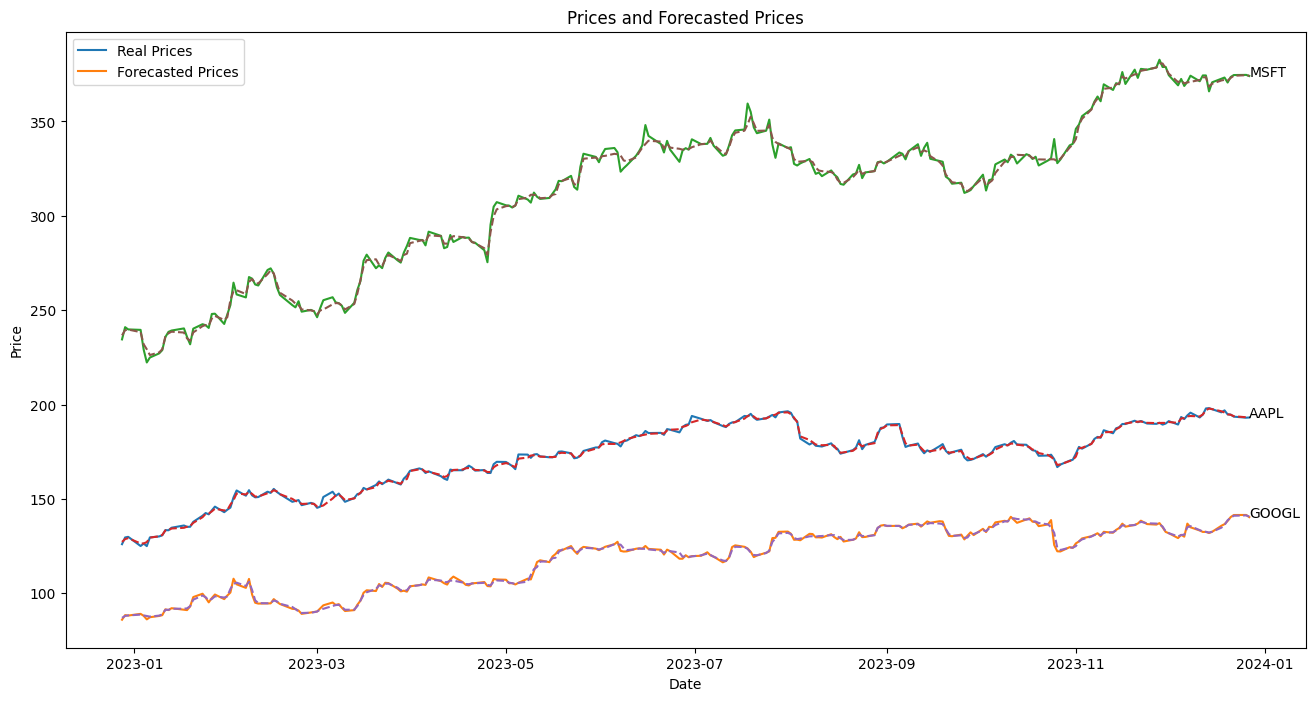

Best Stock: AAPL
Profit after 1 year: 53244.99563113655
Profit after 1 year for AAPL: 53244.99563113655
Profit after 1 year for GOOGL: 63182.981394015136
Profit after 1 year for MSFT: 59497.72279504218


In [29]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Загрузка данных с сайта finam
data = yf.download(['AAPL', 'GOOGL', 'MSFT'], period='1y', progress=False)

# Создание DataFrame с ценами акций
prices = data['Close']

# Прогнозирование цен с помощью случайного леса
forecasted_prices = pd.DataFrame(index=prices.index)

accuracies = []
for stock in prices.columns:
    X = pd.DataFrame(np.arange(len(prices)), columns=['Days'])
    y = prices[stock]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train = r2_score(y_train, y_train_pred)
    accuracy_test = r2_score(y_test, y_test_pred)
    print(f'Model Accuracy for {stock}: Train - {accuracy_train}, Test - {accuracy_test}')
    
    accuracies.append(accuracy_test)
    
    forecasted_prices[stock] = model.predict(X)
  
# Вывод графиков реальных и прогнозируемых цен
plt.figure(figsize=(16, 8))
plt.plot(prices.index, prices.values)
plt.plot(forecasted_prices.index, forecasted_prices.values, linestyle='dashed')
plt.title('Prices and Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Real Prices', 'Forecasted Prices'])

# Добавление подписей именами акций
for stock in prices.columns:
    plt.text(prices.index[-1], prices[stock][-1], stock)

plt.show()



best_stock_index = np.argmax(accuracies)
best_stock = prices.columns[best_stock_index]
print('Best Stock:', best_stock)

initial_investment = 100000

shares = initial_investment / prices.iloc[0][best_stock]
portfolio_value = shares * prices.iloc[-1][best_stock]
profit = portfolio_value - initial_investment

print('Profit after 1 year:', profit)


for stock in prices.columns: 
    initial_investment = 100000
    shares = initial_investment / prices.iloc[0][stock]
    portfolio_value = shares * prices.iloc[-1][stock]
    profit = portfolio_value - initial_investment

    print(f'Profit after 1 year for {stock}: {profit}')


Model Accuracy for AAPL: Train - 0.9985943211547629, Test - 0.9913788803936469
Model Accuracy for GOOGL: Train - 0.9979901478429918, Test - 0.989049190509673
Model Accuracy for MSFT: Train - 0.9987553508274009, Test - 0.9861317846796179


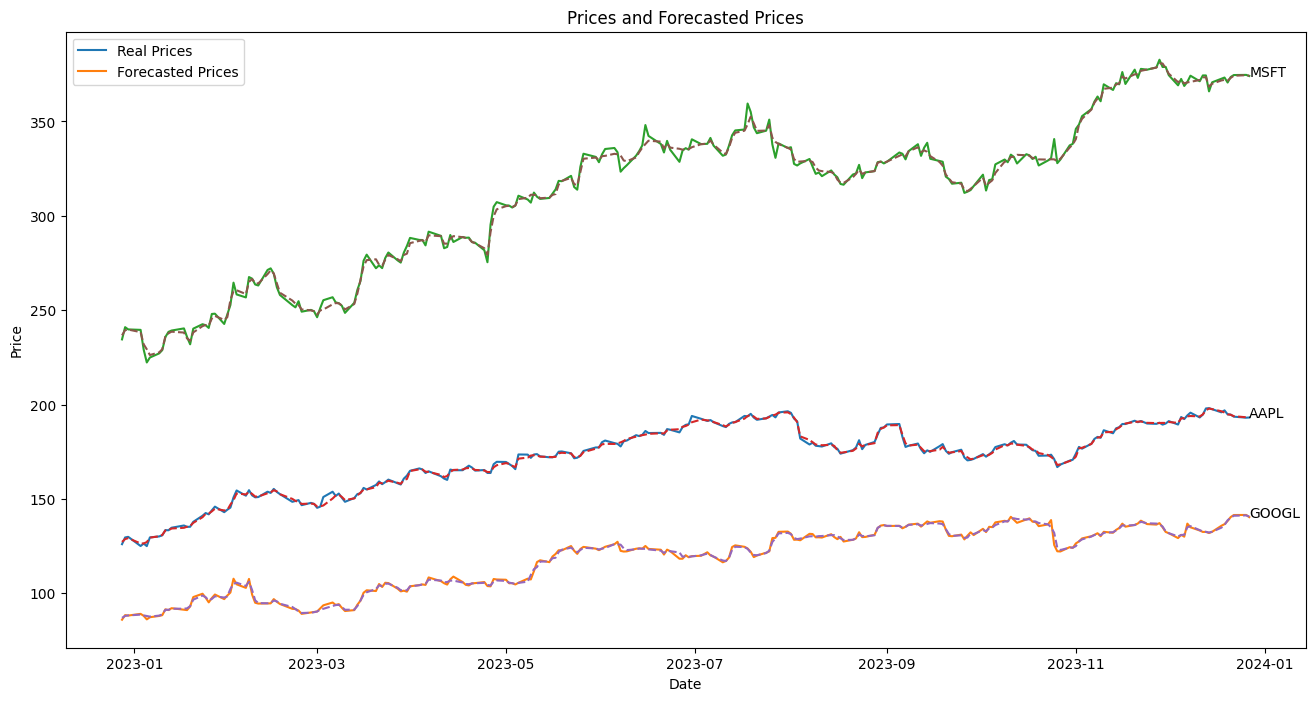

Best Stock: MSFT
Profit after 1 year: 59497.72279504218
Profit after 1 year for AAPL: 53244.99563113655
Profit after 1 year for GOOGL: 63182.981394015136
Profit after 1 year for MSFT: 59497.72279504218


In [32]:
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score


data = yf.download(['AAPL', 'GOOGL', 'MSFT'], period='1y', progress=False)


prices = data['Close']


forecasted_prices = pd.DataFrame(index=prices.index)

accuracies = [] 
profits = {} 
for stock in prices.columns: 
    X = pd.DataFrame(np.arange(len(prices)), columns=['Days']) 
    y = prices[stock] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train = r2_score(y_train, y_train_pred)
    accuracy_test = r2_score(y_test, y_test_pred)
    print(f'Model Accuracy for {stock}: Train - {accuracy_train}, Test - {accuracy_test}')

    accuracies.append(accuracy_test)

    forecasted_prices[stock] = model.predict(X)

initial_investment = 100000
shares = initial_investment / prices.iloc[0][stock]
portfolio_value = shares * prices.iloc[-1][stock]
profit = portfolio_value - initial_investment

profits[stock] = profit

plt.figure(figsize=(16, 8)) 
plt.plot(prices.index, prices.values) 
plt.plot(forecasted_prices.index, forecasted_prices.values, linestyle='dashed') 
plt.title('Prices and Forecasted Prices') 
plt.xlabel('Date') 
plt.ylabel('Price') 
plt.legend(['Real Prices', 'Forecasted Prices'])


for stock in prices.columns:
    plt.text(prices.index[-1], prices[stock][-1], stock)

plt.show()

best_stock_index = np.argmax(list(profits.values())) 
best_stock = list(profits.keys())[best_stock_index] 
print('Best Stock:', best_stock) 
print('Profit after 1 year:', profits[best_stock])


